In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None # recordamos que este comando nos pe
# Para estandarizacion 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Pair Programming Normalización-Estandarización: 

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.
En vuestro dataset habréis identificado unas variables **predictoras** y una variable **respuesta**. 

Los objetivos del pair programming de hoy son:
- Sobre las variables **predictoras**, en este caso deberéis **estandarizar** estas variables. De nuevo, usad el método que prefiráis.
- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [2]:
df = pd.read_csv("data/05-primas_normalizadas.csv", index_col = 0)
df.head(2)

,age,sex,bmi,children,smoker,region,charges,charges_Sklearn
0,19,female,27.90,0,yes,southwest,16884.9240,0.836552
1,18,male,33.77,1,no,southeast,1725.5523,0.032037


In [3]:
numericas = df.select_dtypes(include = np.number)
numericas.head()

,age,bmi,children,charges,charges_Sklearn
0,19,27.90,0,16884.9240,0.836552
1,18,33.77,1,1725.5523,0.032037
2,28,33.00,3,4449.4620,0.176597
3,32,28.88,0,3866.8552,0.145677
4,31,25.74,0,3756.6216,0.139827


In [4]:
numericas.columns

Index(['age', 'bmi', 'children', 'charges', 'charges_Sklearn'], dtype='object')

In [5]:
numericas.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1064.0,38.391917,13.978534,18.0000,26.000000,38.000000,50.000000,64.0000
bmi,1064.0,30.150559,5.922936,15.9600,25.885000,29.920000,33.995000,46.5300
children,1064.0,1.085526,1.225788,0.0000,0.000000,1.000000,2.000000,5.0000
charges,1064.0,7966.400832,4714.913424,1121.8739,3989.362250,7346.934300,11363.950400,19964.7463
charges_Sklearn,1064.0,0.363242,0.250223,0.0000,0.152179,0.330367,0.543552,1.0000


# Estandarización

In [6]:
media = numericas["charges"].mean()
desviacion = numericas["charges"].std() 
print (f' La media de la columna chargues es : {media}')
print (f' La desciación de la columna chargues es : {desviacion}')

 La media de la columna chargues es : 7966.400832000942
 La desciación de la columna chargues es : 4714.91342415426


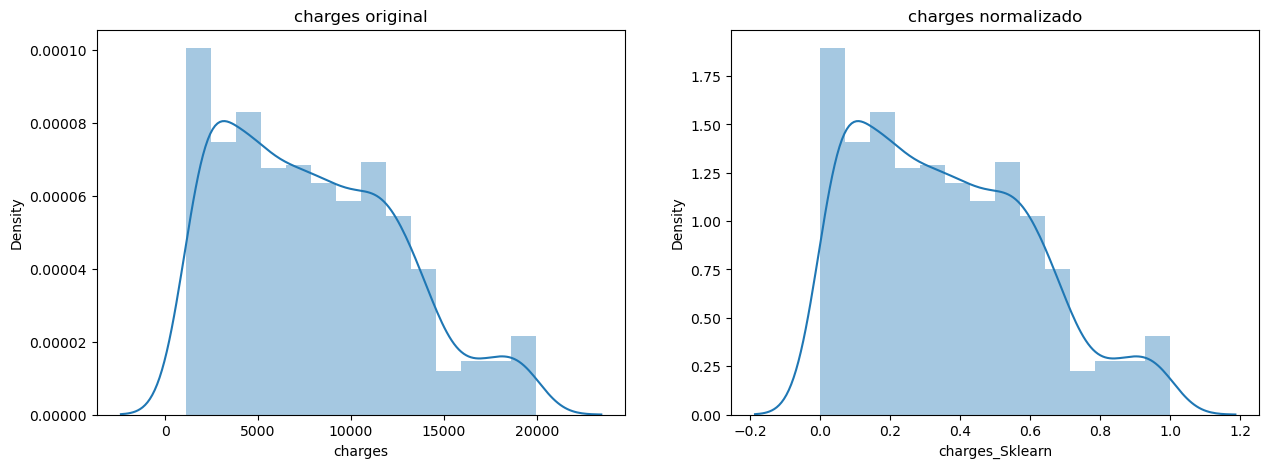

In [7]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('charges original')
axes[1].set_title('charges normalizado')

sns.distplot(numericas['charges'] ,ax = axes[0])
sns.distplot(numericas['charges_Sklearn'], ax = axes[1]);

In [8]:
media_n=np.round(numericas["charges_Sklearn"].mean(),1)
desviacion_n = np.round(numericas["charges_Sklearn"].std(),1)
print (f' La media de la columna charges_Sklearn es : {media_n}')
print (f' La desciación de la columna charges_Sklearn es : {desviacion_n}')

 La media de la columna charges_Sklearn es : 0.4
 La desciación de la columna charges_Sklearn es : 0.3


In [9]:
# iniciamos el método para escalar
scaler = StandardScaler()

In [10]:
# recordemos que la estandarización solo se hace para las variables predictoras. Por lo tanto, lo primero que tenemos que hacer es quitar de nuestro 
## dataframe de "numericas" la columna de la variable respuesta

numericas.drop(["charges", 'charges_Sklearn'], axis = 1, inplace = True)

numericas.head(2)

,age,bmi,children
0,19,27.90,0
1,18,33.77,1


Probamos nuestro primer método : Sklearn StandardScaler

In [11]:
# ajustamos nuestros datos.  
scaler.fit(numericas)

StandardScaler()

In [12]:
# transformamos los datos

X_escaladas = scaler.transform(numericas)

In [13]:
# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,age,bmi,children
0,-1.387916,-0.380152,-0.885991
1,-1.459488,0.611376,-0.069805


In [14]:
for columna in numericas_estandar.columns:
    print(f'La media de la columna {columna} es:  {numericas_estandar[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_estandar[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna age es:  -1.7028984738611423e-16
La desviación estándar de la columna age es: 1.0004702563156693
-------------------------------------------------------------
La media de la columna bmi es:  3.005114953872604e-16
La desviación estándar de la columna bmi es: 1.0004702563156702
-------------------------------------------------------------
La media de la columna children es:  2.5042624615605033e-17
La desviación estándar de la columna children es: 1.0004702563156735
-------------------------------------------------------------


Ya estan estandarizadas ahora lo comprobamos analiticamente

In [15]:
numericas_estandar.head(2)

,age,bmi,children
0,-1.387916,-0.380152,-0.885991
1,-1.459488,0.611376,-0.069805


In [16]:
numericas_estandar.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1064.0,-1.702898e-16,1.00047,-1.459488,-0.886913,-0.028050,0.830813,1.832819
bmi,1064.0,3.005115e-16,1.00047,-2.396992,-0.720515,-0.038945,0.649382,2.766726
children,1064.0,2.504262e-17,1.00047,-0.885991,-0.885991,-0.069805,0.746380,3.194936


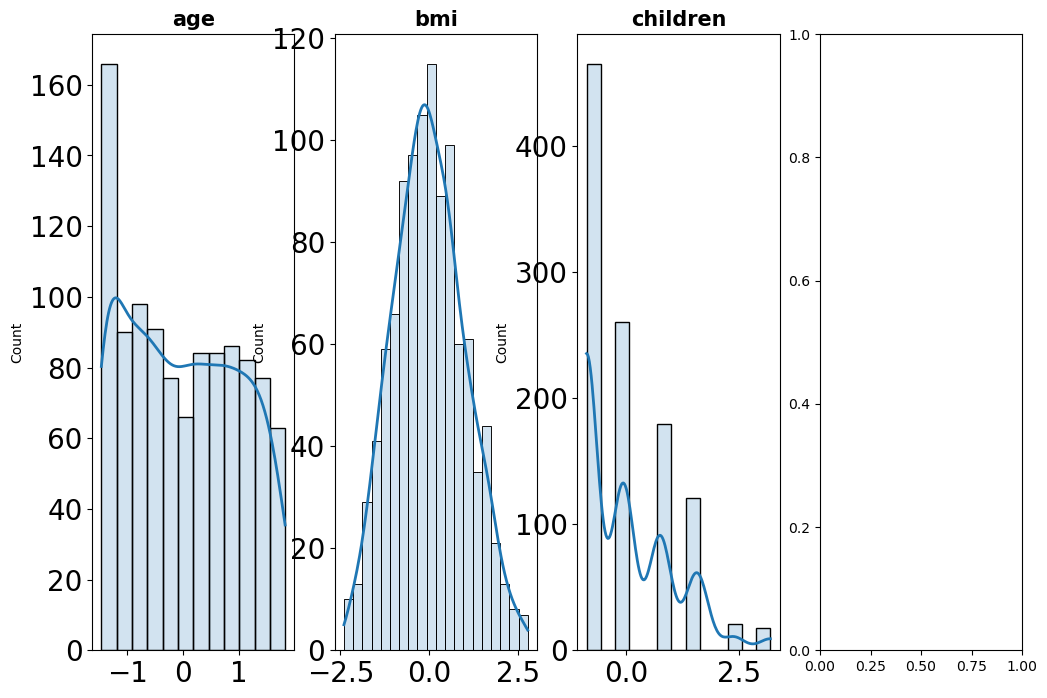

In [17]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 8))
columnas_estandar = numericas_estandar.columns
axes = axes.flat
for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_estandar,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("");

Probamos el metodo : Sklearn RobustScaler

In [18]:
# construir el modelo de escalador
robust = RobustScaler()

In [19]:
# ajustamos el modelo utilizando nuestro set de datos
robust.fit(numericas)

RobustScaler()

In [20]:
# transformamos los datos
X_robust = robust.transform(numericas)

In [21]:
# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_robust = pd.DataFrame(X_robust, columns = numericas.columns)
numericas_robust.head(2)

,age,bmi,children
0,-0.791667,-0.249075,-0.5
1,-0.833333,0.474723,0.0


In [22]:
for columna in numericas_robust.columns:
    print(f'La media de la columna {columna} es:  {numericas_robust[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_robust[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna age es:  0.016329887218045114
La desviación estándar de la columna age es: 0.5824389092271709
-------------------------------------------------------------
La media de la columna bmi es:  0.028429002530988144
La desviación estándar de la columna bmi es: 0.7303250138659847
-------------------------------------------------------------
La media de la columna children es:  0.04276315789473684
La desviación estándar de la columna children es: 0.6128939697623248
-------------------------------------------------------------


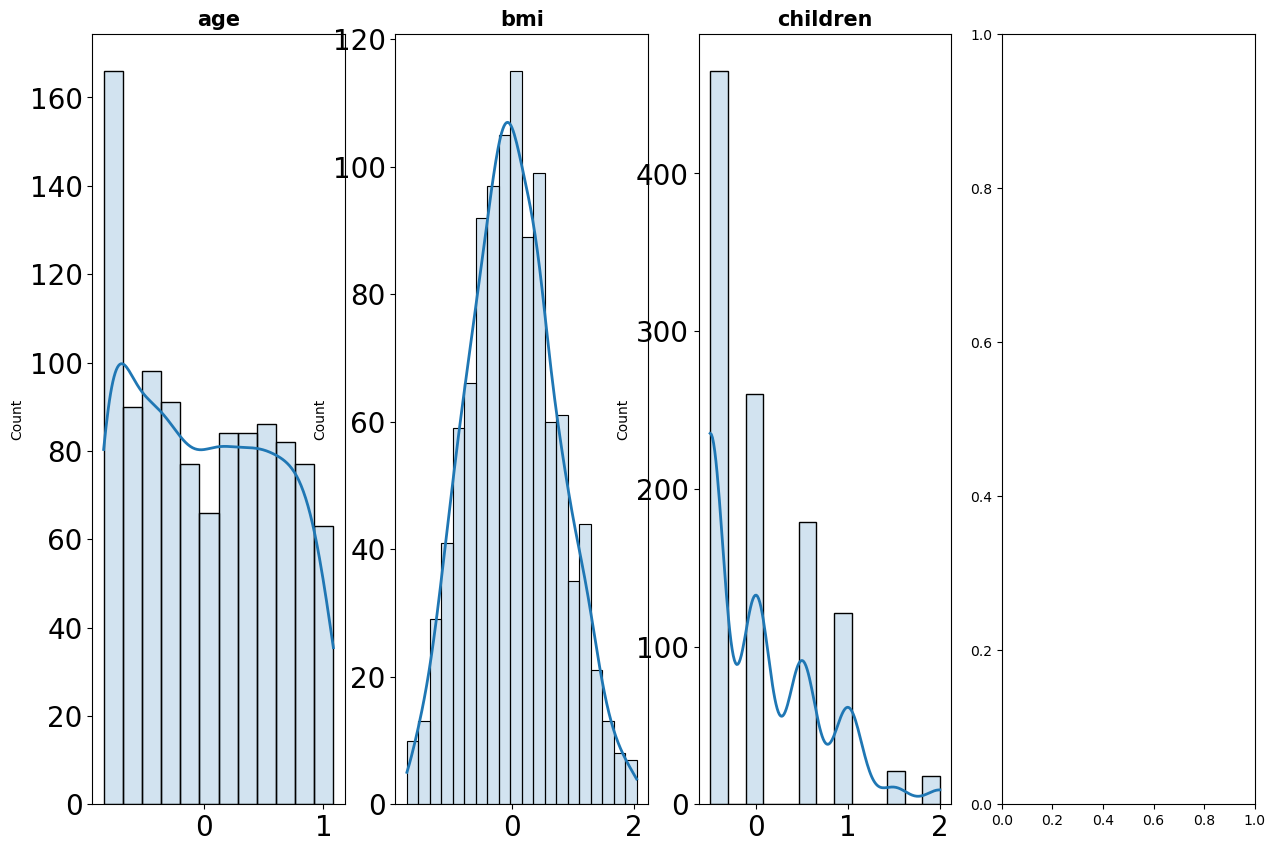

In [23]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 10))

columnas_robust = numericas_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

In [24]:
df1=df.copy()

In [25]:
# vamos a guardar este dataframe para seguir trabajando en la siguiente lección de Encoding con el. 
# Pero antes de eso tenemos que juntar los resultados de la estandarización a nuestro dataframe original
df1[numericas_estandar.columns] = numericas_estandar
df1.head()

,age,sex,bmi,children,smoker,region,charges,charges_Sklearn
0,-1.387916,female,-0.380152,-0.885991,yes,southwest,16884.9240,0.836552
1,-1.459488,male,0.611376,-0.069805,no,southeast,1725.5523,0.032037
2,-0.743769,male,0.481312,1.562566,no,southeast,4449.4620,0.176597
3,-0.457482,male,-0.214616,-0.885991,no,northwest,3866.8552,0.145677
4,-0.529054,female,-0.745008,-0.885991,no,southeast,3756.6216,0.139827


In [26]:
# vamos a eliminar la columna de MEDV ya que esta dos veces en el dataframe

df1.drop("charges", axis = 1, inplace = True)

In [27]:
df2=df.copy()

In [28]:
df2[numericas_robust.columns] = numericas_robust
df2.head()

,age,sex,bmi,children,smoker,region,charges,charges_Sklearn
0,-0.791667,female,-0.249075,-0.5,yes,southwest,16884.9240,0.836552
1,-0.833333,male,0.474723,0.0,no,southeast,1725.5523,0.032037
2,-0.416667,male,0.379778,1.0,no,southeast,4449.4620,0.176597
3,-0.250000,male,-0.128237,-0.5,no,northwest,3866.8552,0.145677
4,-0.291667,female,-0.515413,-0.5,no,southeast,3756.6216,0.139827


Solo con la normalizada

In [29]:
df1.head(2)

,age,sex,bmi,children,smoker,region,charges_Sklearn
0,-1.387916,female,-0.380152,-0.885991,yes,southwest,0.836552
1,-1.459488,male,0.611376,-0.069805,no,southeast,0.032037


Con la normalizada y la normal

In [30]:
df2.head(2)

,age,sex,bmi,children,smoker,region,charges,charges_Sklearn
0,-0.791667,female,-0.249075,-0.5,yes,southwest,16884.9240,0.836552
1,-0.833333,male,0.474723,0.0,no,southeast,1725.5523,0.032037


In [31]:
# guardamos los datos
df1.to_csv("data/05-primas_norm_est_1.csv")

In [32]:
# guardamos los datos
df2.to_csv("data/05-primas_norm_est_2.csv")